In [164]:
#import libraries and CSVs, print to ensure they are read correctly

import pandas as pd
import sqlite3
import urllib.request

sites = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/stone-kelley-kelleystone/focal_csv.csv")
hierapolis = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/stone-kelley-kelleystone/hierapolis_tumulus.csv")
terms = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/stone-kelley-kelleystone/def_terms.csv")
dates = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/stone-kelley-kelleystone/dates.csv")

print(type(sites))
print(type(hierapolis))
print(type(terms))
print(type(dates))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [165]:
#importing visualization framework

import pip

import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

In [189]:
#load into memory and the data into SQL

conn = sqlite3.connect(':memory:')

sites.to_sql('sites', conn, if_exists="replace")
hierapolis.to_sql('hierapolis', conn, if_exists="replace")
terms.to_sql('terms', conn, if_exists="replace")
dates.to_sql('dates', conn, if_exists="replace")

# Using the data to find averages and outliers in dimesions

In [167]:
# looking at the number of burials in each tumulus

burial_data = pd.read_sql("""SELECT tumulus_name,no_burial_min 
    FROM HIERAPOLIS 
    WHERE tum_dia >= 0""", conn)

print(dia_data)

    tumulus_name  no_burial_min  tum_dia
0   Tumulus Tp92              2     9.80
1     Tumulus NT              4    12.95
2   Tumulus T117              4    11.00
3    Tumulus T98              2    10.20
4    Tumulus T84              6    11.00
5   Tumulus 81T1              6    12.50
6    Tumulus T51              3     6.80
7    Tumulus T50              7     6.50
8   Tumulus 35T1              3     9.15
9    Tumulus T33              6     8.80
10  Tumulus 19T1              4     8.50
11   Tumulus T15              7    10.50


In [168]:
#finding the average burial number
mean(burial_data)

no_burial_min    4.352941
dtype: float64

In [169]:
#looking at the number of burials where the tumulus diameter is known (removing dia=0)

dia_data = pd.read_sql("""SELECT tumulus_name,no_burial_min,tum_dia 
    FROM HIERAPOLIS 
    WHERE tum_dia > 0""", conn)

print(dia_data)

    tumulus_name  no_burial_min  tum_dia
0   Tumulus Tp92              2     9.80
1     Tumulus NT              4    12.95
2   Tumulus T117              4    11.00
3    Tumulus T98              2    10.20
4    Tumulus T84              6    11.00
5   Tumulus 81T1              6    12.50
6    Tumulus T51              3     6.80
7    Tumulus T50              7     6.50
8   Tumulus 35T1              3     9.15
9    Tumulus T33              6     8.80
10  Tumulus 19T1              4     8.50
11   Tumulus T15              7    10.50


In [170]:
#finding the average tumulus diameter (when dia=0 removed)

dia_data2 = pd.read_sql("""SELECT tumulus_name,tum_dia 
    FROM HIERAPOLIS 
    WHERE tum_dia > 0""", conn)

mean(dia_data2)

tum_dia    9.808333
dtype: float64

In [171]:
#comparing single chamber tumuli with known measurements and their averages

single_data = pd.read_sql("""SELECT tumulus_name,tumulus_type,tum_dia,cham1_l,cham1_w,anti_l,anti_w,no_burial_min 
    FROM HIERAPOLIS
    WHERE tum_dia > 0 AND anti_l > 0 AND anti_w > 0 AND tumulus_type = 'chamber'""", conn)

print(single_data)

mean(single_data)

   tumulus_name tumulus_type  tum_dia  cham1_l  cham1_w  anti_l  anti_w  \
0  Tumulus Tp92      chamber     9.80     1.82     2.25    1.07    1.47   
1  Tumulus 81T1      chamber    12.50     2.95     2.95    1.54    1.64   
2   Tumulus T51      chamber     6.80     2.80     2.80    1.38    1.41   
3   Tumulus T50      chamber     6.50     2.70     2.70    1.30    1.30   
4  Tumulus 35T1      chamber     9.15     2.70     2.70    1.34    1.92   
5   Tumulus T33      chamber     8.80     2.70     2.70    1.10    1.31   
6  Tumulus 19T1      chamber     8.50     2.70     2.70    1.40    1.60   
7   Tumulus T15      chamber    10.50     2.70     2.75    1.36    1.76   

   no_burial_min  
0              2  
1              6  
2              3  
3              7  
4              3  
5              6  
6              4  
7              7  


tum_dia          9.06875
cham1_l          2.63375
cham1_w          2.69375
anti_l           1.31125
anti_w           1.55125
no_burial_min    4.75000
dtype: float64

In [172]:
#comparing dual chamber tumuli with known measurements and their averages

dual_data = pd.read_sql("""SELECT tumulus_name,tumulus_type,tum_dia,cham1_l,cham1_w,cham2_l,cham2_w,anti_l,anti_w,no_burial_min 
    FROM HIERAPOLIS
    WHERE tum_dia > 0 AND anti_l > 0 AND anti_w > 0 AND tumulus_type = 'dual chamber'""", conn)

print(dual_data)

mean(dual_data)

   tumulus_name  tumulus_type  tum_dia  cham1_l  cham1_w  cham2_l  cham2_w  \
0    Tumulus NT  dual chamber    12.95      2.6     2.70     1.83     1.87   
1  Tumulus T117  dual chamber    11.00      2.6     2.75     1.80     2.60   

   anti_l  anti_w  no_burial_min  
0    1.18    0.96              4  
1    1.20    1.70              4  


tum_dia          11.975
cham1_l           2.600
cham1_w           2.725
cham2_l           1.815
cham2_w           2.235
anti_l            1.190
anti_w            1.330
no_burial_min     4.000
dtype: float64

# Combining tables

In [231]:
#setting date words to their respective starting date numerals

early_date = pd.read_sql("""SELECT hierapolis.tumulus_name, hierapolis.earliest_date, dates.early_no 
    FROM HIERAPOLIS, DATES
    WHERE hierapolis.earliest_date=dates.date_words 
    ORDER BY tumulus_name""", conn)

late_date = pd.read_sql("""SELECT hierapolis.tumulus_name, hierapolis.latest_date, dates.early_no 
    FROM HIERAPOLIS, DATES
    WHERE hierapolis.latest_date=dates.date_words 
    ORDER BY tumulus_name""", conn)

print(early_date)
print(late_date)

    tumulus_name    earliest_date  early_no
0   Tumulus 14T1          unknown         0
1   Tumulus 19T1  2nd century BCE      -200
2   Tumulus 35T1  2nd century BCE      -200
3   Tumulus 81T1  2nd century BCE      -200
4    Tumulus C30          unknown         0
5     Tumulus NT  1st century BCE      -100
6   Tumulus T117  1st century BCE      -100
7    Tumulus T15  2nd century BCE      -200
8    Tumulus T33          unknown         0
9    Tumulus T50   1st century CE         1
10   Tumulus T51          unknown         0
11   Tumulus T84          unknown         0
12   Tumulus T88          unknown         0
13   Tumulus T97          unknown         0
14   Tumulus T98  1st century BCE      -100
15   Tumulus Tp1  1st century BCE      -100
16  Tumulus Tp92  1st century BCE      -100
    tumulus_name     latest_date  early_no
0   Tumulus 14T1  3rd century CE       201
1   Tumulus 19T1  3rd century CE       201
2   Tumulus 35T1  1st century CE         1
3   Tumulus 81T1         unknown    

# Visualizing the data

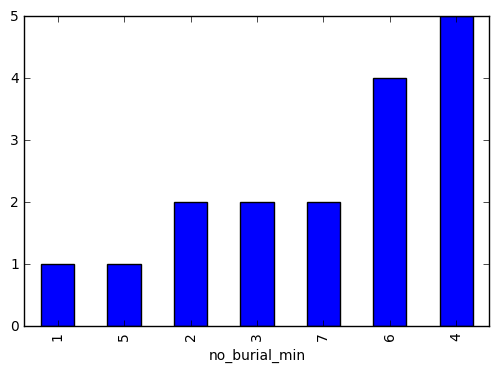

In [174]:
#number of tumuli with specific minimum number of burials

tumulus_size = hierapolis['tum_dia'].dropna()
burial_numbers = hierapolis['no_burial_min'].dropna()

tumulus_size.groupby(burial_numbers).count().sort_values().plot.bar()

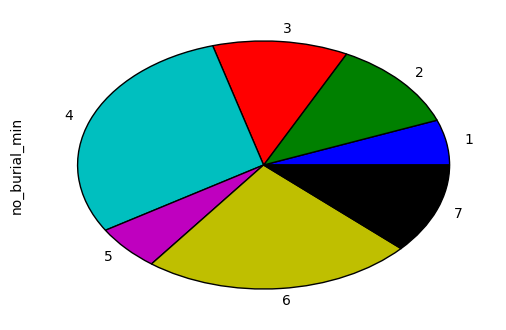

In [212]:
#number of tumuli with specific minimum number of burials

tumulus_size = hierapolis['tum_dia'].dropna()
burials = hierapolis['no_burial_min'].dropna()

burials.groupby(burials).count().plot.pie()

earliest_date
1st century BCE    Axes(0.125,0.125;0.775x0.775)
1st century CE     Axes(0.125,0.125;0.775x0.775)
2nd century BCE    Axes(0.125,0.125;0.775x0.775)
unknown            Axes(0.125,0.125;0.775x0.775)
Name: tum_dia, dtype: object

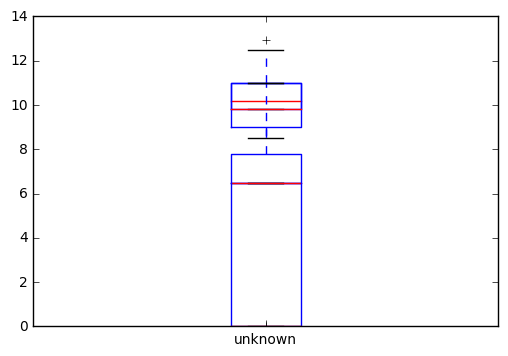

In [232]:
#tumulus diameter grouped by date 

date = hierapolis['earliest_date'].dropna()
tum_size = hierapolis['tum_dia'].dropna()

tum_size.groupby(date).plot.box()

# Text Data

In [226]:
#grave goods

gg_data = pd.read_sql("""SELECT tumulus_name,earliest_date,good_types 
    FROM HIERAPOLIS """, conn)
print(gg_data)

    tumulus_name    earliest_date                                  good_types
0   Tumulus Tp92  1st century BCE                 sarcophagus, pottery, stele
1    Tumulus Tp1  1st century BCE               common terracotta unguentaria
2     Tumulus NT  1st century BCE                                     unknown
3   Tumulus T117  1st century BCE  oil lamps, fragmented unguentaria, pottery
4    Tumulus T98  1st century BCE                      pottery, glass, a coin
5    Tumulus T97          unknown                                 sarcophagus
6    Tumulus T88          unknown                          sarcophagus, stele
7    Tumulus T84          unknown        stele, oil lamps, several sarcophagi
8   Tumulus 81T1  2nd century BCE                         sarcophagus, cippus
9    Tumulus T51          unknown                                 inscription
10   Tumulus T50   1st century CE                                 small finds
11  Tumulus 35T1  2nd century BCE                        pottery

In [222]:
#construction methods and materials

con_data = pd.read_sql("""SELECT tumulus_name,construction,material
    FROM HIERAPOLIS""", conn)
print(con_data)

    tumulus_name                  construction                       material
0   Tumulus Tp92  masonry with Galatian vaults                     travertine
1    Tumulus Tp1                       masonry        unfinished stone blocks
2     Tumulus NT                       masonry                  marble blocks
3   Tumulus T117                ashlar masonry                     travertine
4    Tumulus T98                ashlar masonry           porous marble blocks
5    Tumulus T97       pseudo-isodomic masonry               cut stone blocks
6    Tumulus T88                       masonry               cut stone blocks
7    Tumulus T84                       masonry                     travertine
8   Tumulus 81T1                       masonry               cut stone blocks
9    Tumulus T51                ashlar masonry               limestone blocks
10   Tumulus T50                       masonry               cut stone blocks
11  Tumulus 35T1                ashlar masonry               cut

In [224]:
#tumulus architectural elements

arch_data = pd.read_sql("""SELECT tumulus_name,tumulus_type,tum_dia,arch_other1,arch_other2,arch_other3
    FROM HIERAPOLIS """, conn)
print(arch_data)

    tumulus_name  tumulus_type  tum_dia       arch_other1   arch_other2  \
0   Tumulus Tp92       chamber     9.80         anticella        dromos   
1    Tumulus Tp1       chamber     0.00         anticella          None   
2     Tumulus NT  dual chamber    12.95         anticella        dromos   
3   Tumulus T117  dual chamber    11.00  dromos-anticella     crepidoma   
4    Tumulus T98  dual chamber    10.20         anticella        dromos   
5    Tumulus T97       chamber     0.00         anticella        dromos   
6    Tumulus T88  dual chamber     0.00         anticella          None   
7    Tumulus T84  dual chamber    11.00            dromos     crepidoma   
8   Tumulus 81T1       chamber    12.50         anticella        dromos   
9    Tumulus T51       chamber     6.80  dromos-anticella     crepidoma   
10   Tumulus T50       chamber     6.50         anticella     crepidoma   
11  Tumulus 35T1       chamber     9.15         anticella        dromos   
12   Tumulus T33       ch

In [225]:
#terminology definitions

print(terms)

                            term  \
0                        chamber   
1                   dual chamber   
2                      anticella   
3                         dromos   
4                      crepidoma   
5               dromos-anticella   
6                   masonry wall   
7                external dromos   
8                        masonry   
9                 ashlar masonry   
10  masonry with Galatain vaults   
11       pseudo-isodomic masonry   
12                    inhumation   

                                           definition  
0    a single large room within the tumulus structure  
1                   a tumulus containing two chambers  
2   a small room serving as an entranceway to the ...  
3           an entrance passageway inside the tumulus  
4          the platform on which the tumulus is built  
5       an entranceway room smaller than an anticella  
6   wall constructed in the masonry style, located...  
7   an entrance passageway located outside the 

# Link to Carto Map

In [216]:
https://kelleystone.carto.com/viz/8909d1fc-aa9d-11e6-a9af-0ee66e2c9693/public_map

SyntaxError: invalid syntax (<ipython-input-216-ea8130c2c7fb>, line 1)

In [217]:
import webbrowser
webbrowser.open("https://kelleystone.carto.com/viz/8909d1fc-aa9d-11e6-a9af-0ee66e2c9693/public_map")


True